In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from google.colab import files

In [2]:
# Upload Kaggle credentials
files.upload()

# Setup Kaggle API
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
# Download the dataset using the API
!kaggle datasets download -d gauravduttakiit/smoker-status-prediction-using-biosignals
# Unzipping the downloaded file
!unzip smoker-status-prediction-using-biosignals.zip

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction-using-biosignals
License(s): apache-2.0
 77% 1.00M/1.30M [00:00<00:00, 1.97MB/s]
100% 1.30M/1.30M [00:00<00:00, 2.40MB/s]
Archive:  smoker-status-prediction-using-biosignals.zip
  inflating: test_dataset.csv        
  inflating: train_dataset.csv       


In [4]:
# Load the train and test datasets
df_train = pd.read_csv('train_dataset.csv')
df_test = pd.read_csv('test_dataset.csv')

# Add a column to indicate the source of the data
df_train['dataset'] = 'train'
df_test['dataset'] = 'test'

# Combine the two DataFrames
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Save the combined dataset to a new CSV file
df_combined.to_csv('combined_dataset.csv', index=False)

# Load the combined dataset
df = pd.read_csv('combined_dataset.csv')

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  55692 non-null  int64  
 1   height(cm)           55692 non-null  int64  
 2   weight(kg)           55692 non-null  int64  
 3   waist(cm)            55692 non-null  float64
 4   eyesight(left)       55692 non-null  float64
 5   eyesight(right)      55692 non-null  float64
 6   hearing(left)        55692 non-null  int64  
 7   hearing(right)       55692 non-null  int64  
 8   systolic             55692 non-null  int64  
 9   relaxation           55692 non-null  int64  
 10  fasting blood sugar  55692 non-null  int64  
 11  Cholesterol          55692 non-null  int64  
 12  triglyceride         55692 non-null  int64  
 13  HDL                  55692 non-null  int64  
 14  LDL                  55692 non-null  int64  
 15  hemoglobin           55692 non-null 

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,dataset
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,142,19.8,1,1.0,61,115,125,1,1.0,train
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,114,15.9,1,1.1,19,25,30,1,0.0,train
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,112,13.7,3,0.6,1090,1400,276,0,0.0,train
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,91,16.9,1,0.9,32,36,36,0,0.0,train
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,92,14.9,1,1.2,26,28,15,0,0.0,train


In [5]:
# Check for missing values
null_counts = df.isnull().sum()
print("Null values in each column:\n", null_counts[null_counts > 0])

Null values in each column:
 smoking    16708
dtype: int64


In [6]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Check the shape of the cleaned DataFrame
print(f'Original DataFrame shape: {df.shape}')
print(f'Cleaned DataFrame shape: {df_cleaned.shape}')

Number of duplicate rows: 6515
Original DataFrame shape: (55692, 24)
Cleaned DataFrame shape: (49177, 24)


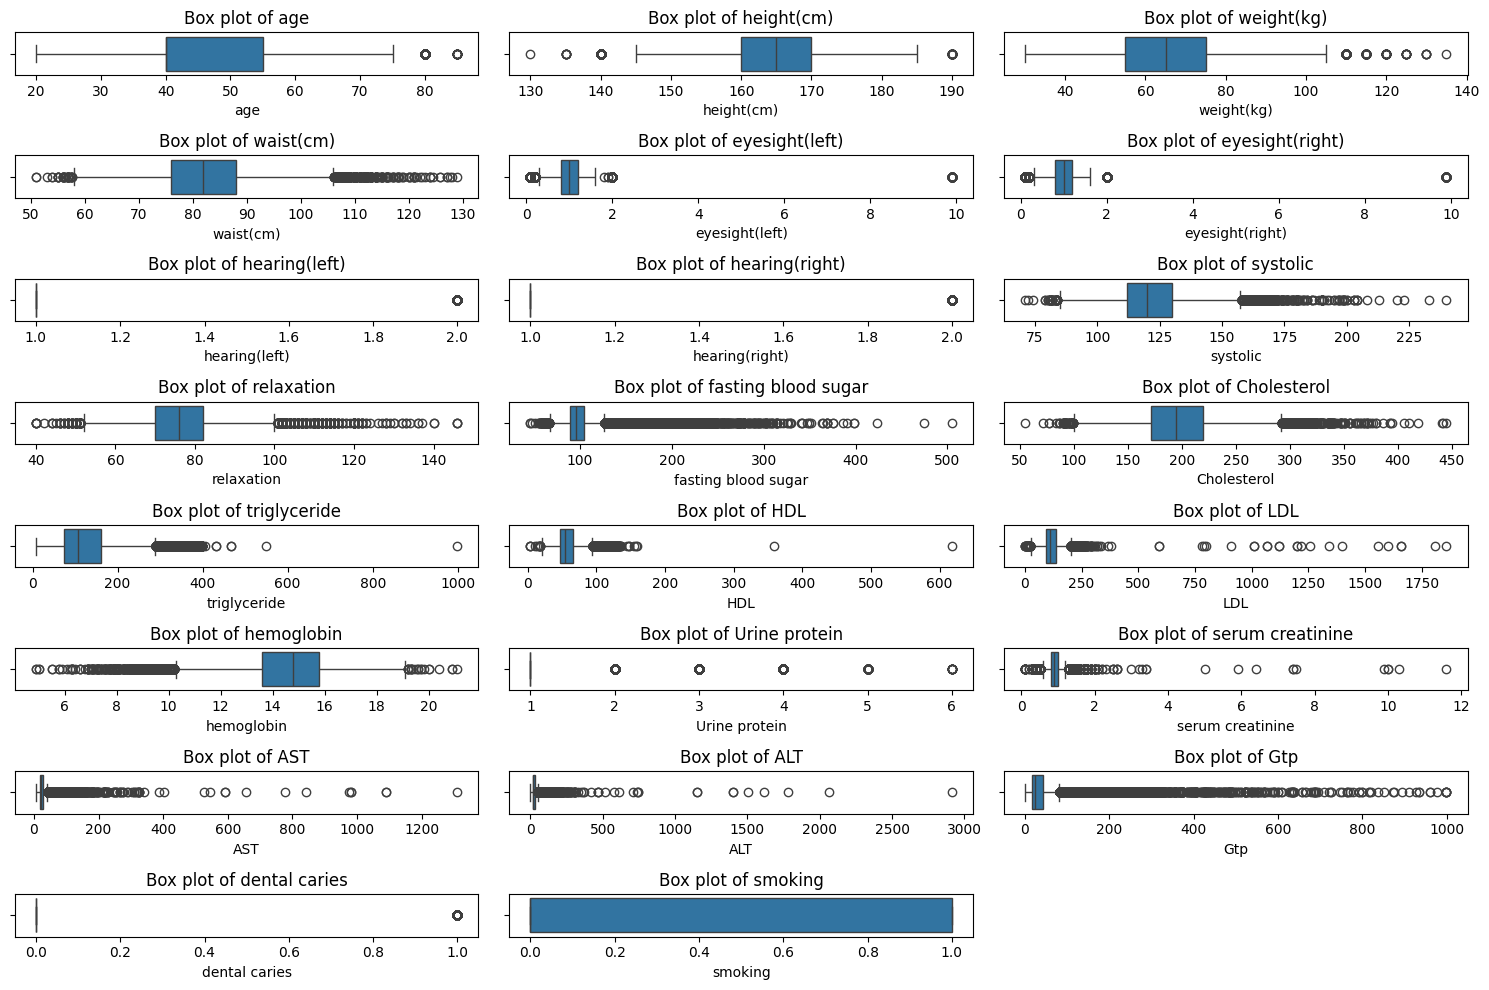

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numerical columns for outlier visualization
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Set up the plotting area
plt.figure(figsize=(15, 10))

# Generate box plots for each numerical feature
for i, col in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


In [8]:
# Identifying and removing outliers using the IQR method

# Select only numerical columns for outlier detection
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Initialize an empty DataFrame to store rows without outliers
df_no_outliers = df_cleaned.copy()

for col in numeric_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

print("Original dataset shape:", df_cleaned.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)


Original dataset shape: (49177, 24)
Dataset shape after removing outliers: (14949, 24)


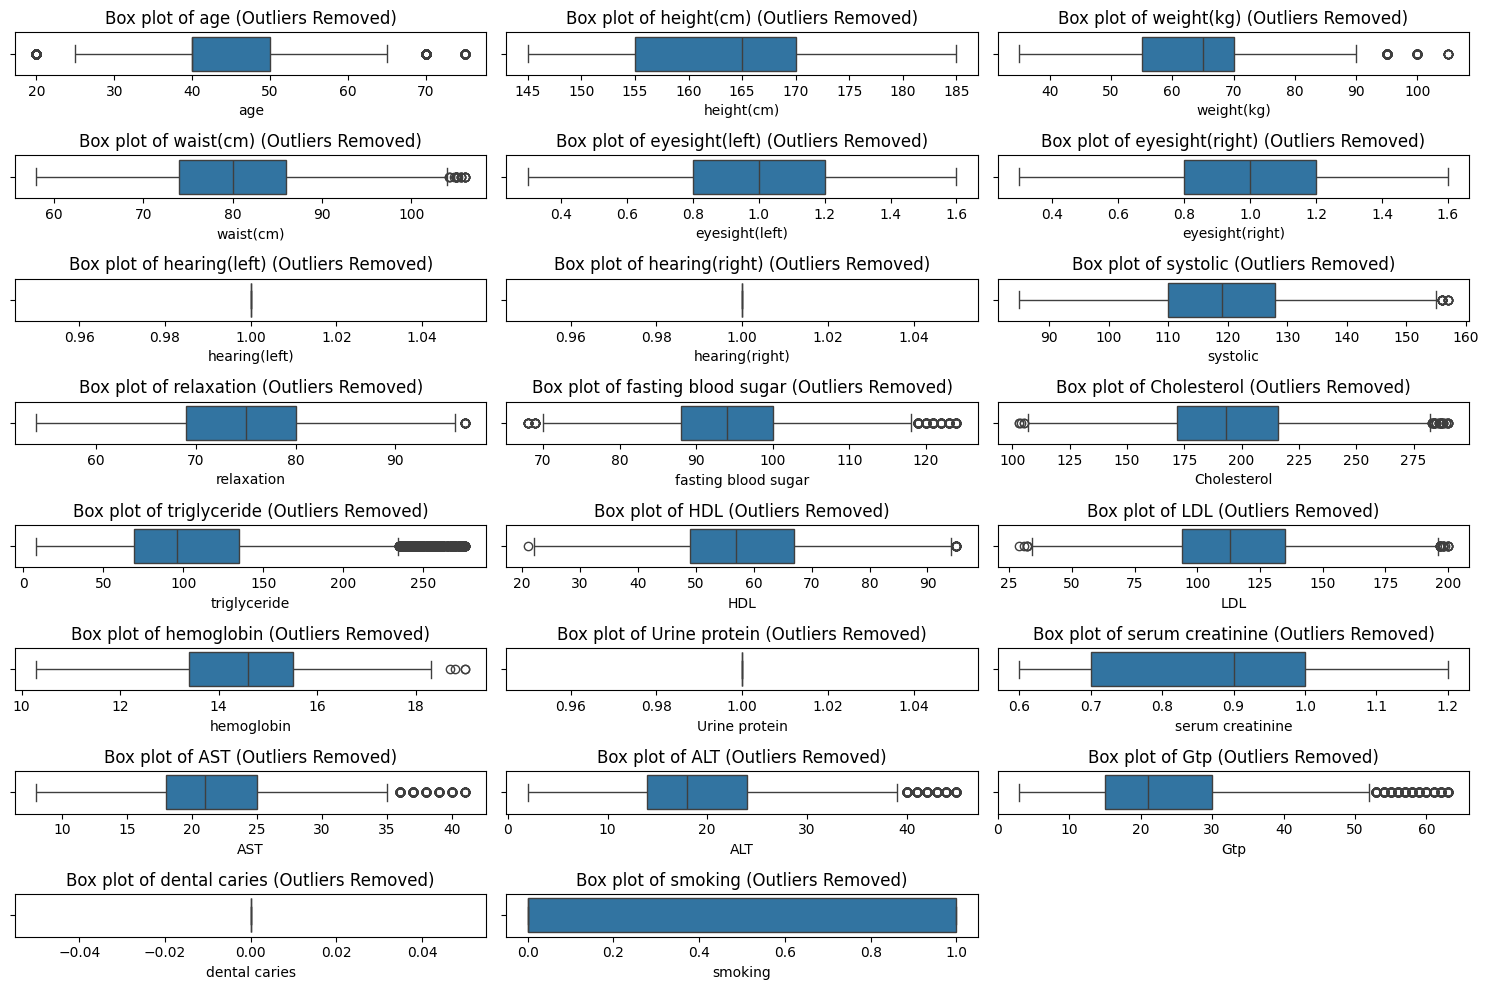

In [9]:
# Visualize the dataset after outlier removal
plt.figure(figsize=(15, 10))

# Generate box plots for each numerical feature after outlier removal
for i, col in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i)
    sns.boxplot(data=df_no_outliers, x=col)
    plt.title(f'Box plot of {col} (Outliers Removed)')

plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
scaler = StandardScaler()
numeric_cols = df_no_outliers.select_dtypes(include=[np.number]).columns
df_no_outliers[numeric_cols] = scaler.fit_transform(df_no_outliers[numeric_cols])


In [11]:
df_no_outliers.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,dataset
9,0.123138,-1.005403,-0.761314,-0.247974,-1.054869,-0.024305,0.0,0.0,-0.417852,0.776571,...,-0.259724,-0.970333,0.0,-1.659746,-0.037337,-0.629819,2.602449,0.0,-0.647602,train
11,0.556877,-1.005403,-1.198301,-0.971107,-1.731734,-0.702813,0.0,0.0,-0.582582,-1.232677,...,-1.535169,-1.397880,0.0,0.177148,-0.037337,-1.002657,-1.110175,0.0,-0.647602,train
14,-0.310601,-1.551881,-2.072275,-2.176329,-0.039573,1.671963,0.0,0.0,-1.488595,-0.287148,...,1.754135,-0.756560,0.0,0.789446,0.147480,-0.505539,-0.532656,0.0,-0.647602,train
19,0.990616,1.180507,0.549646,0.595681,0.637291,0.654202,0.0,0.0,-0.747312,-0.523531,...,-1.400912,0.312306,0.0,-0.435150,-0.406970,-0.505539,-0.450153,0.0,-0.647602,train
20,0.123138,1.180507,0.549646,-0.006929,0.637291,0.654202,0.0,0.0,0.899986,0.658380,...,1.149977,0.241048,0.0,1.401744,0.886746,0.985814,-0.285148,0.0,-0.647602,train
21,-1.611819,0.634030,0.549646,0.354637,0.637291,1.671963,0.0,0.0,-0.088393,0.421998,...,-0.628932,1.309915,0.0,1.401744,-0.591786,-1.002657,-0.615159,0.0,-0.647602,train
22,-0.310601,0.087552,-0.324327,-0.440809,-0.378005,-1.042066,0.0,0.0,-1.570960,-1.469059,...,-1.702991,-1.967942,0.0,-0.435150,-0.222153,-1.126937,-0.120142,0.0,-0.647602,train
26,0.990616,-1.005403,-1.198301,-0.609540,-1.054869,-2.059827,0.0,0.0,0.488162,-0.523531,...,1.619878,-2.039200,0.0,-1.047448,0.332296,-0.008422,-0.780164,0.0,-0.647602,train
29,2.291834,-0.458926,-1.198301,-0.127452,-0.716437,-1.720573,0.0,0.0,0.076337,-0.523531,...,1.015720,0.241048,0.0,-1.659746,-1.515868,-1.126937,0.374875,0.0,1.544158,train
31,0.990616,-0.458926,-0.761314,-0.127452,-0.039573,-0.024305,0.0,0.0,-0.253122,0.067425,...,-0.461110,-0.400271,0.0,0.177148,2.734910,0.612976,0.374875,0.0,-0.647602,train


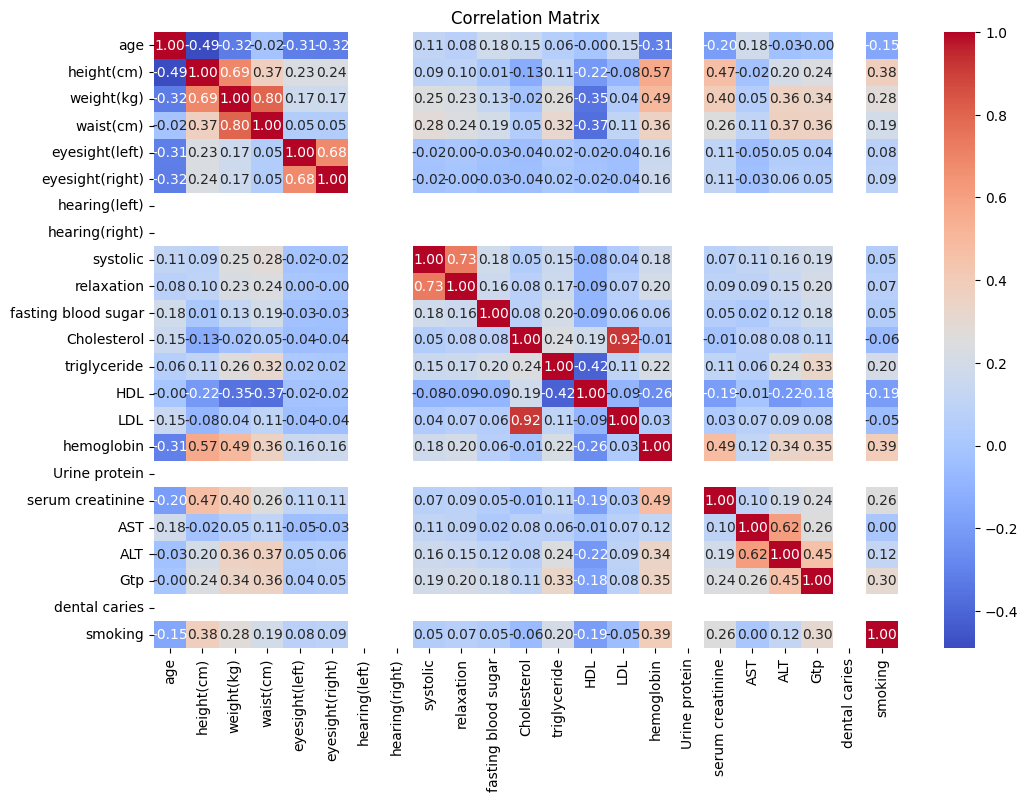

Highly correlated features to remove: {'LDL'}


In [24]:
# Exclude non-numerical columns
numeric_df = df_no_outliers.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Set a threshold for high correlation (e.g., 0.8)
high_correlation_threshold = 0.8
high_corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_correlation_threshold:
            high_corr_features.add(correlation_matrix.columns[i])

print("Highly correlated features to remove:", high_corr_features)

# Drop highly correlated features
df_no_outliers = df_no_outliers.drop(columns=high_corr_features)


In [25]:
from sklearn.model_selection import train_test_split

# Drop the 'dataset' column
X = df_no_outliers.drop(columns=['smoking', 'dataset'])  # Replace 'smoking' with the actual target column name
y = df_no_outliers['smoking']


In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Initialize an empty list to store results
results = []

# Define a cross-validation function
def evaluate_model(model, X_train, y_train):
    # Use cross-validation to get scores
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(precision_score, average='macro')).mean()
    recall = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(recall_score, average='macro')).mean()
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average='macro')).mean()

    return accuracy, precision, recall, f1

# Evaluate each model using cross-validation
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

In [33]:
# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.744461   0.689346  0.655763  0.665805
1        Random Forest  0.748391   0.694099  0.659687  0.665341
2    Gradient Boosting  0.753909   0.702541  0.675012  0.684548
3                  SVM  0.754577   0.705123  0.663434  0.675290
4                 K-NN  0.714357   0.649070  0.633327  0.638852
5          Naive Bayes  0.698637   0.667249  0.694203  0.669947
6        Decision Tree  0.685676   0.625331  0.619804  0.625148


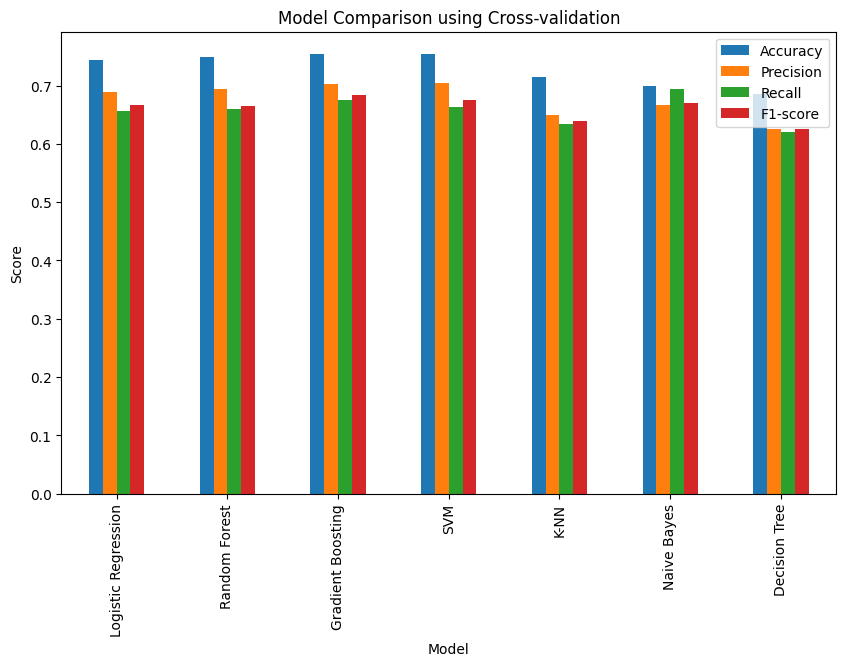

In [34]:
# Visualize the model comparison
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison using Cross-validation')
plt.ylabel('Score')
plt.show()